<a href="https://colab.research.google.com/github/Ryzon3/csci_6967/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports and some of following code referenced from: https://github.com/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/TitanicExample.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

# **Task 1**

I first researched for a python implementation of the original repo that was linked. I ended up selecting [char-rnn.pytorch](https://github.com/spro/char-rnn.pytorch) due to it operating within the pytorch framework.

In [ ]:
!git clone https://github.com/spro/char-rnn.pytorch.git
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

fatal: destination path 'char-rnn.pytorch' already exists and is not an empty directory.
--2025-02-24 21:10:35--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2025-02-24 21:10:36 (26.1 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
!pip install unidecode
!python char-rnn.pytorch/train.py input.txt --n_epochs 5
!python char-rnn.pytorch/generate.py input.pt --prime_str "Where"

Training for 5 epochs...
100% 5/5 [00:04<00:00,  1.01it/s]
Saving...
Saved as input.pt
/content/char-rnn.pytorch/generate.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [ ]:
!python char-rnn.pytorch/train.py input.txt --n_epochs 50
!python char-rnn.pytorch/generate.py input.pt --prime_str "Where"

Training for 50 epochs...
100% 50/50 [00:52<00:00,  1.05s/it]
Saving...
Saved as input.pt
/content/char-rnn.pytorch/generate.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

In [ ]:
!python char-rnn.pytorch/train.py input.txt --n_epochs 500
!python char-rnn.pytorch/generate.py input.pt --prime_str "Where"

Training for 500 epochs...
 20% 99/500 [01:58<08:33,  1.28s/it] 59s (100 20%) 1.7550]
Whatte beards doth ere is of my so botors mail Calpale do in more horet, lord smill seen his masters a 

 40% 199/500 [03:42<05:20,  1.06s/it] 43s (200 40%) 1.6018]
While sears,
You gone seen should hards.
The honour scorn to so sposed so you:
The bold not the sunt i 

 60% 299/500 [05:26<03:35,  1.07s/it] 27s (300 60%) 1.5186]
While him in reasich.

Second Citle:
This he remes in thut year,
Her sook with a belectolous
More fals 

 80% 399/500 [07:12<01:44,  1.04s/it] 13s (400 80%) 1.4738]
Which with every it
That we need if a rich to the charbent
The be his mother while them relare.

ABRAS 

100% 499/500 [08:56<00:01,  1.03s/it] 57s (500 100%) 1.4637]
Whow you fear, and since you what's mark in my father
In a rofirst this name forth crow and so speak;
 

100% 500/500 [08:57<00:00,  1.08s/it]
Saving...
Saved as input.pt
/content/char-rnn.pytorch/generate.py:54: FutureWarning: You are using `torch.load

## Observations after first 3 trainings of different epochs

For 5 epochs there are barely any real english words and the text seems almost random just vaguely following structure of a written language. It is entirely incomprehensible. Next for 50 epochs the text is recongizable as some form of horrible english. It is almost like a toddler is trying to write down a sentence but doesn't know strucutre or what a word is. Lastly for 500 epochs almost every word is a real word and the sentences seem to be somewhat make sense.

In [ ]:
!python char-rnn.pytorch/train.py input.txt --n_epochs 5 --model LSTM
!python char-rnn.pytorch/generate.py input.pt --prime_str "Where"

Training for 5 epochs...
100% 5/5 [00:11<00:00,  2.23s/it]
Saving...
Saved as input.pt
/content/char-rnn.pytorch/generate.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [ ]:
!python char-rnn.pytorch/train.py input.txt --n_epochs 50 --model LSTM
!python char-rnn.pytorch/generate.py input.pt --prime_str "Where"

Training for 50 epochs...
100% 50/50 [01:17<00:00,  1.55s/it]
Saving...
Saved as input.pt
/content/char-rnn.pytorch/generate.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

In [ ]:
!python char-rnn.pytorch/train.py input.txt --n_epochs 500 --model LSTM
!python char-rnn.pytorch/generate.py input.pt --prime_str "Where"

Training for 500 epochs...
 20% 99/500 [02:31<10:00,  1.50s/it] 34s (100 20%) 1.9305]
Whe for we you farn the perpimen the wish of the the worcear! Eswere.

JARRERANTE:
Bugh worcent ack an 

 40% 199/500 [05:04<07:13,  1.44s/it] 5s (200 40%) 1.6854]
Whand it supter, no my they the puty wear, you to my suvering be benty him it a kene of you marry long 

 60% 299/500 [07:37<05:08,  1.53s/it] 39s (300 60%) 1.6339]
What bender eneming the more in this succlinh with they rest think athend fathes with a grient to thee 

 80% 399/500 [10:10<02:39,  1.58s/it] 11s (400 80%) 1.5599]
What for my known, in besellant: he reges to we thee sing-stricges their blesser in despircument all f 

100% 499/500 [12:42<00:01,  1.45s/it] 43s (500 100%) 1.5149]
What's swearing advised out of my meady blem will were lies Auve a for and princely thee in your grace 

100% 500/500 [12:43<00:00,  1.53s/it]
Saving...
Saved as input.pt
/content/char-rnn.pytorch/generate.py:54: FutureWarning: You are using `torch.load`

## Observations after first 3 trainings of different epochs LSTM

For 5 epochs the results are the same as the RNN, not at all readable but seems to be trying to recreate text. It is entirely incomprehensible. Next for 50 epochs the text is similar to the RNN results but seems to have picked up that some lines should start with character names unlike the RNN. However the word structure and sentence structure seems worse than the RNN. Lastly for 500 epochs the results are certainly better for the LSTM than the 50 epochs but I would judge it to be worse than the RNN. It seems to have learned more complex patterns with character names and semicolons but did not gain the ability to create an almost coherent sentence.

# **Task 2**

For this question I am going to use [Amazon Stock Price](https://www.kaggle.com/datasets/eneskosar19/amazon-stock-price/data) from kaggle.

I will begin with EDA and preprocessing

In [ ]:
import kagglehub

# Login to kaggle
kagglehub.login()

# Download latest version
path = kagglehub.dataset_download("eneskosar19/amazon-stock-price")

print("Path to dataset files:", path)

100%|██████████| 152k/152k [00:00<00:00, 31.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/eneskosar19/amazon-stock-price/versions/1


## **Exploratory Data Analysis**

In [ ]:
# Load dataset and preview with colab
df = pd.read_csv(path + '/Amazon_Stock_Price.csv', index_col='Date', parse_dates=True)
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000
2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000
2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000
2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000
2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000


In [ ]:
# Starting EDA, by confirming feature count
df.shape

(6050, 5)

In [ ]:
# Detect missing values
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
# Now let's get the general info on the dataset, we can see they are all numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6050 entries, 2000-01-03 to 2024-01-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6050 non-null   float64
 1   High    6050 non-null   float64
 2   Low     6050 non-null   float64
 3   Close   6050 non-null   float64
 4   Volume  6050 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.6 KB


In [ ]:
# Since they are all numerical it's very useful to check the stats of each feature, we can note they all vary in scale for later, will be useful to normalize
df.describe()

,Open,High,Low,Close,Volume
count,6050.000000,6050.000000,6050.000000,6050.000000,6.050000e+03
mean,38.160734,38.614074,37.670999,38.152548,1.215715e+08
std,51.780179,52.388542,51.116488,51.754349,9.824691e+07
min,0.295500,0.305000,0.275500,0.298500,1.762600e+07
25%,2.269625,2.307250,2.231313,2.275125,6.547000e+07
50%,10.353250,10.634750,10.219750,10.486250,9.917500e+07
75%,64.440501,65.273502,63.576249,64.713247,1.459845e+08
max,187.199997,188.654007,184.839493,186.570496,2.086584e+09


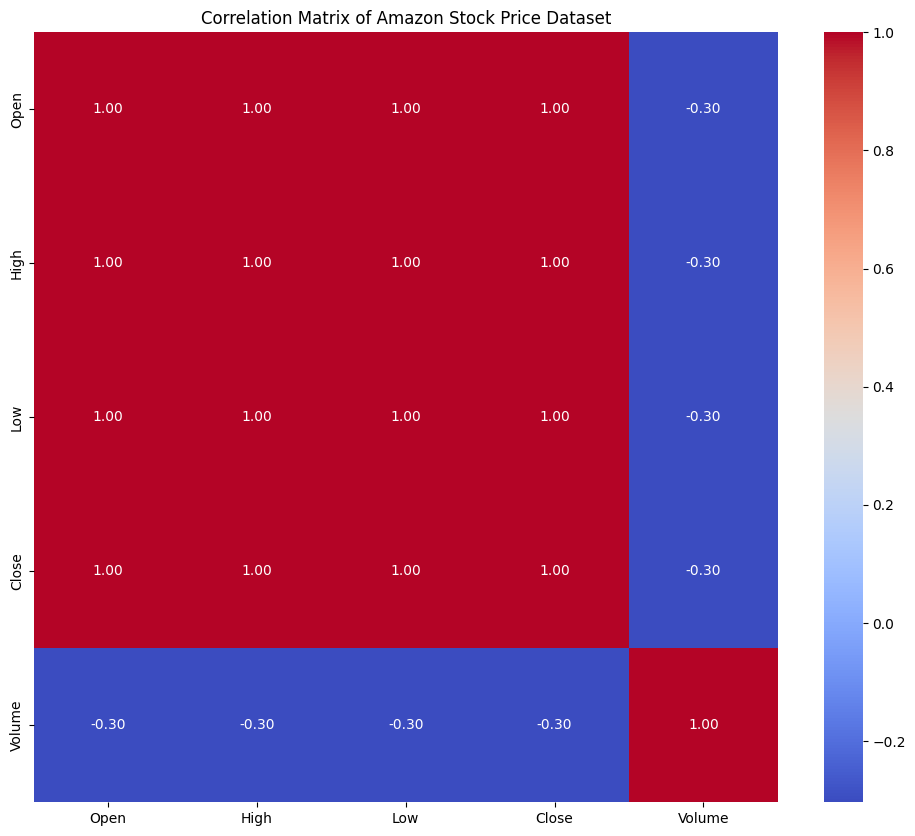

In [ ]:
# Generate correlation matrix
corr_matrix = df.corr()

# Plotting seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Amazon Stock Price Dataset')
plt.show()

Text(0.5, 1.0, 'Amazon Stock Prices Dataset over time')

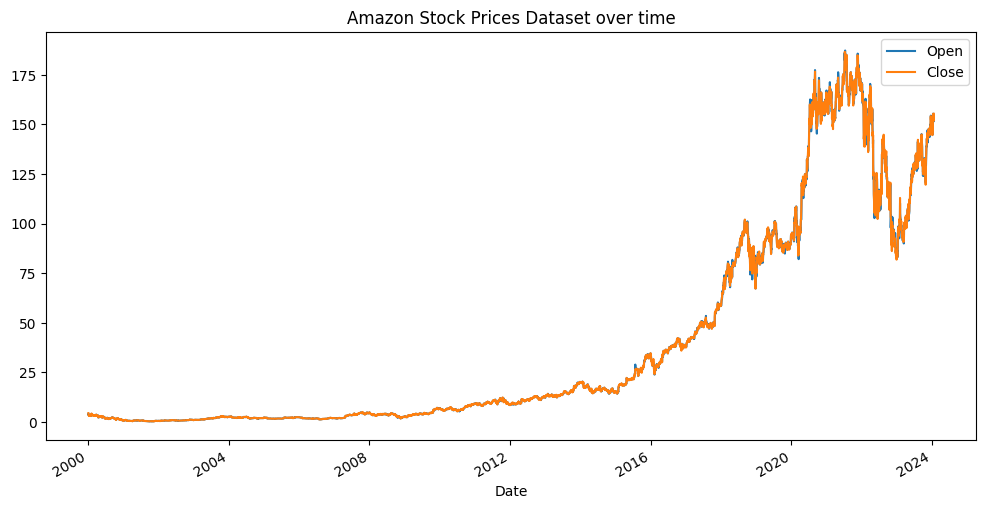

In [ ]:
time_plot = df[['Open','Close']]
time_plot.plot(figsize = (12,6))
plt.title('Amazon Stock Prices Dataset over time')

In [ ]:
# We will choose past 2021 as our test set since it is future data, since open and close have 100% correlation I will just take the opening value
train = df[:'2021'].iloc[:,0].values
test = df['2022':].iloc[:,0].values
print(train.shape)

(5536,)


In [ ]:
# Apply MinMaxScaler to the data to keep within a better range for model
scaler = MinMaxScaler()
train = scaler.fit_transform(train.reshape(-1,1))
test = scaler.transform(test.reshape(-1,1))
# Next create x_train and y_train, same with x_test y_test
x_train = []
y_train = []
for i in range(60,len(train)):
  x_train.append(train[i-60:i,0])
  y_train.append(train[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_test = []
y_test = []

for i in range(60,len(test)):
  x_test.append(test[i-60:i,0])
  y_test.append(test[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_train.shape, y_train.shape)

(5476, 60, 1) (5476,)


I implement an RNN with the tanh function since it is zero centered leading to better results with the RNN.

In [ ]:
# Starting implementation for RNN
import torch
import torch.nn as nn
import torch.optim as optim


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()

        # Set parameters
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # RNN layer with tanh activation
        self.rnn = nn.RNN(input_size, hidden_size, num_layers,
                          batch_first=True, nonlinearity='tanh')
        # Fully-connected layer for final output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Forward propagate RNN; out has shape (batch, seq_len, hidden_size)
        out, _ = self.rnn(x, h0)
        # Use the output from the last time step
        out = self.fc(out[:, -1, :])
        return out


Training Basic RNN...
Basic RNN Epoch [10/100], Loss: 0.0447
Basic RNN Epoch [20/100], Loss: 0.0176
Basic RNN Epoch [30/100], Loss: 0.0041
Basic RNN Epoch [40/100], Loss: 0.0018
Basic RNN Epoch [50/100], Loss: 0.0005
Basic RNN Epoch [60/100], Loss: 0.0003
Basic RNN Epoch [70/100], Loss: 0.0002
Basic RNN Epoch [80/100], Loss: 0.0002
Basic RNN Epoch [90/100], Loss: 0.0002
Basic RNN Epoch [100/100], Loss: 0.0002
Basic RNN Test Loss: 0.0008


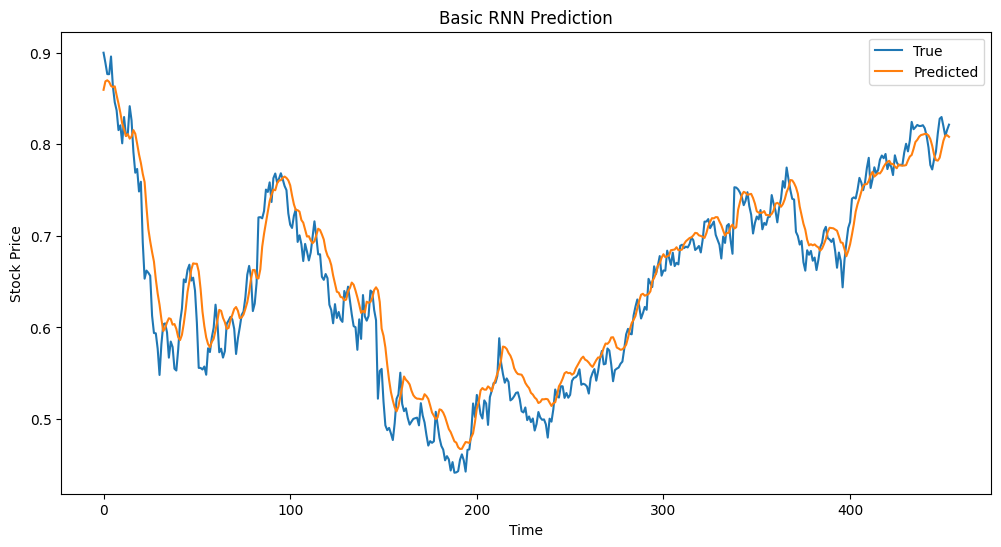

In [ ]:
# Convert data to tensor for torch
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
x_test_tensor = torch.from_numpy(x_test).float()
y_test_tensor = torch.from_numpy(y_test).float()


# Function to train and evaluate differnent models
def train_and_evaluate(model, model_name, num_epochs=100, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    print(f"\nTraining {model_name}...")
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train_tensor)
        loss = criterion(outputs.squeeze(), y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'{model_name} Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    model.eval()
    with torch.no_grad():
        test_predictions = model(x_test_tensor)
        test_loss = criterion(test_predictions.squeeze(), y_test_tensor)
        print(f'{model_name} Test Loss: {test_loss.item():.4f}')

        # Plot test predictions vs true values
        plt.figure(figsize=(12, 6))
        plt.plot(y_test_tensor.numpy(), label='True')
        plt.plot(test_predictions.squeeze().numpy(), label='Predicted')
        plt.title(f'{model_name} Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

    return test_loss.item()


# Hyperparameters
hidden_size = 50
num_layers = 1
learning_rate = 0.001
num_epochs = 100

basic_rnn_model = RNNModel(1, hidden_size, num_layers, 1)
loss_rnn = train_and_evaluate(basic_rnn_model, "Basic RNN", num_epochs, learning_rate)

In [ ]:
class LSTM_GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, cell_type='LSTM'):
        super(LSTM_GRU, self).__init__()
        self.cell_type = cell_type.upper()  # Ensure case consistency
        self.num_layers = num_layers
        self.hidden_size = hidden_size

        if self.cell_type == 'LSTM':
            self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        elif self.cell_type == 'GRU':
            self.rnn = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state (and cell state for LSTM)
        if self.cell_type == 'LSTM':
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, device=x.device)
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, device=x.device)
            out, _ = self.rnn(x, (h0, c0))
        elif self.cell_type == 'GRU':
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, device=x.device)
            out, _ = self.rnn(x, h0)

        # Use the output from the last time step
        out = self.fc(out[:, -1, :])
        return out


Training LSTM...
LSTM Epoch [10/100], Loss: 0.0557
LSTM Epoch [20/100], Loss: 0.0458
LSTM Epoch [30/100], Loss: 0.0272
LSTM Epoch [40/100], Loss: 0.0046
LSTM Epoch [50/100], Loss: 0.0020
LSTM Epoch [60/100], Loss: 0.0003
LSTM Epoch [70/100], Loss: 0.0004
LSTM Epoch [80/100], Loss: 0.0003
LSTM Epoch [90/100], Loss: 0.0002
LSTM Epoch [100/100], Loss: 0.0002
LSTM Test Loss: 0.0027


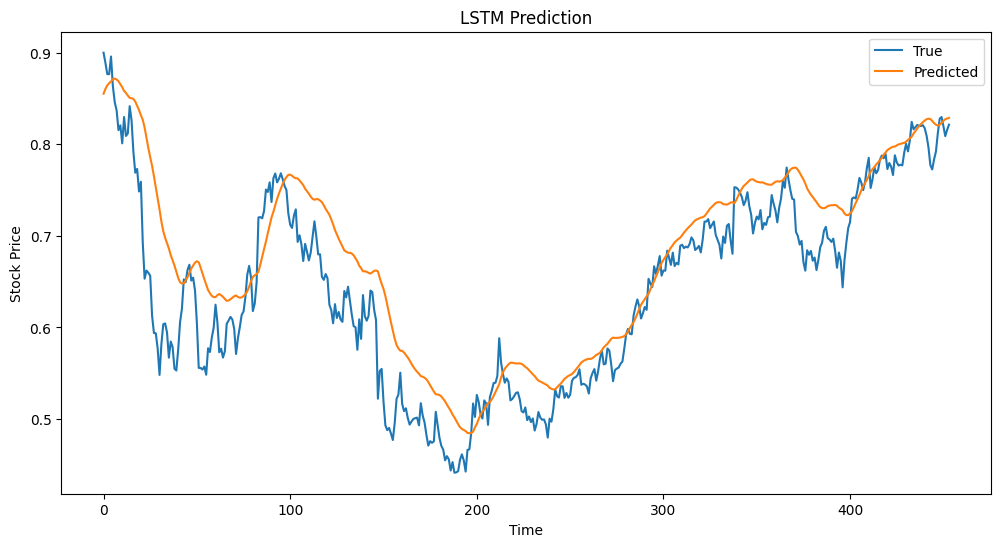


Training GRU...
GRU Epoch [10/100], Loss: 0.0451
GRU Epoch [20/100], Loss: 0.0332
GRU Epoch [30/100], Loss: 0.0173
GRU Epoch [40/100], Loss: 0.0010
GRU Epoch [50/100], Loss: 0.0009
GRU Epoch [60/100], Loss: 0.0006
GRU Epoch [70/100], Loss: 0.0001
GRU Epoch [80/100], Loss: 0.0001
GRU Epoch [90/100], Loss: 0.0001
GRU Epoch [100/100], Loss: 0.0001
GRU Test Loss: 0.0007


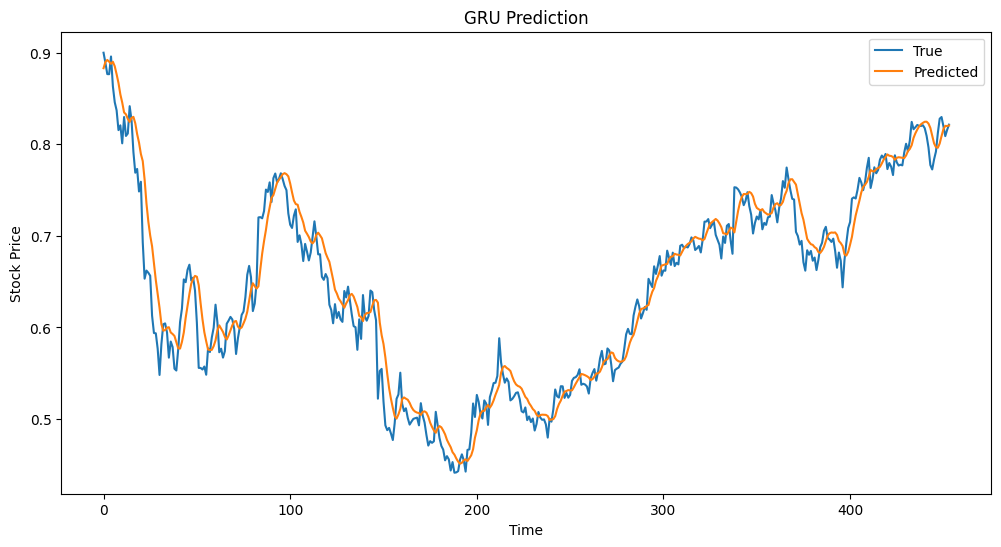

In [ ]:
lstm_model = LSTM_GRU(1, hidden_size, num_layers, 1, cell_type='LSTM')
gru_model = LSTM_GRU(1, hidden_size, num_layers, 1, cell_type='GRU')

loss_lstm = train_and_evaluate(lstm_model, "LSTM", num_epochs, learning_rate)
loss_gru = train_and_evaluate(gru_model, "GRU", num_epochs, learning_rate)

Looking at our evaluation metrics. I chose two things to analyze performance first is the MSELoss on the test set and second was plotting the charts against the real data and doing an "eye test". First looking at loss the LSTM model performed the worst by far. The other two models, the basic RNN and the GRU were very close in performance. Looking at the plots this is even more true the LSTM fails to stick close the the actual line. The GRU and basic RNN seem very comparable in performance howeever.

## Part 3
I could have used a traditional model for this since I applied a sliding window to the data and fixing the length, the RNN model however has the advantage of being able to stick to more variable length tasks. The traditional model as well might not capture the temporal data as well since it is not designed for the task. Therefore we can conclude that through good feature engineering potentially a traditional model could match up but it is unlikely to outperform an RNN for the task.

# Task 3

In [ ]:
# Get glove embeddings from: https://huggingface.co/stanfordnlp/glove/blob/main/glove.42B.300d.zip
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip
!unzip glove.42B.300d.zip

--2025-02-25 01:57:30--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip
Resolving huggingface.co (huggingface.co)... 18.164.174.17, 18.164.174.55, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.17|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/stanfordnlp/glove/357baac33090f645e71e253b3295ee1b767c98a0336e9a1d99c77e9e33b43c4a?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27glove.42B.300d.zip%3B+filename%3D%22glove.42B.300d.zip%22%3B&response-content-type=application%2Fzip&Expires=1740452250&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MDQ1MjI1MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9zdGFuZm9yZG5scC9nbG92ZS8zNTdiYWFjMzMwOTBmNjQ1ZTcxZTI1M2IzMjk1ZWUxYjc2N2M5OGEwMzM2ZTlhMWQ5OWM3N2U5ZTMzYjQzYzRhP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=vSVdL45p4W-laQYP0YS5Aw3QGZob6mEO

I chose the glove embeddings for their balance of efficiency and effectiveness. They provide quick and accurate embeddings without the overhead of a model. Although when they are pretrained it doesn't really matter as much but to match a more realistic scenario I chose them.

In [ ]:
embeddings = {}
with open('glove.42B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split(' ')
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        embeddings[word] = vector

In [ ]:
def fetch_embedding(word):
    word = word.lower()

    if word in embeddings:
        return embeddings[word]
    else:
        print(f"Word '{word}' not found in the embeddings.")
        return np.zeros(300)

inp1 = input("Please input a word to fetch the embedding: ")
inp2 = input("Please input a word to fetch the embedding: ")
print(f"Embedding for '{inp1}': {fetch_embedding(inp1)[:10]}...")
print(f"Embedding for '{inp2}': {fetch_embedding(inp2)[:10]}...")

Please input a word to fetch the embedding: Twitch
Please input a word to fetch the embedding: Shaco
Embedding for 'Twitch': [-0.50275   0.067913 -0.42124  -0.94081  -0.18439  -0.34932  -0.89579
  0.45367  -0.015252 -0.10252 ]...
Embedding for 'Shaco': [ 0.45758   0.63946   0.13256  -0.24612   0.47326  -0.49198   0.38731
 -0.33174  -0.26351   0.051051]...


To approximate embeddings for glove we might instead find the top K closest words in terms of characters and then average their embeddings. This likely would not be the best approximation but its the best I could come up with for the Glove embeddings.

In [ ]:
def cos_sim(emb1, emb2):
    return np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))

# Test it on soccer vs dog vs cat
dog_emb = fetch_embedding('dog')
cat_emb = fetch_embedding('cat')
soccer_emb = fetch_embedding('soccer')

print(f"Cosine similarity between dog and cat: {cos_sim(dog_emb, cat_emb)}")
print(f"Cosine similarity between dog and soccer: {cos_sim(dog_emb, soccer_emb)}")
print(f"Cosine similarity between cat and soccer: {cos_sim(cat_emb, soccer_emb)}")

Cosine similarity between dog and cat: 0.7885448336601257
Cosine similarity between dog and soccer: 0.345172256231308
Cosine similarity between cat and soccer: 0.2631109952926636


Cosine similarity is useful in embedding space since instead of matching distance between vectors it measures the angle. This means that we can check how close vectors are without worrying about exact distances.

In [ ]:
def batch_cosine_similarity(word_pairs):
    results = []
    for w1, w2 in word_pairs:
        emb1 = fetch_embedding(w1)
        emb2 = fetch_embedding(w2)
        sim = cos_sim(emb1, emb2)
        results.append(((w1, w2), sim))
    return results

word_pairs = [("cat", "dog"), ("king", "queen"), ("apple", "soccer"), ("pal", "goat")]
batch_results = batch_cosine_similarity(word_pairs)
print("Batch Cosine Similarity Results:")
for pair, sim in batch_results:
    print(f"Cosine similarity between '{pair[0]}' and '{pair[1]}': {sim:.4f}")

Batch Cosine Similarity Results:
Cosine similarity between 'cat' and 'dog': 0.7885
Cosine similarity between 'king' and 'queen': 0.7596
Cosine similarity between 'apple' and 'soccer': 0.2191
Cosine similarity between 'pal' and 'goat': 0.1627


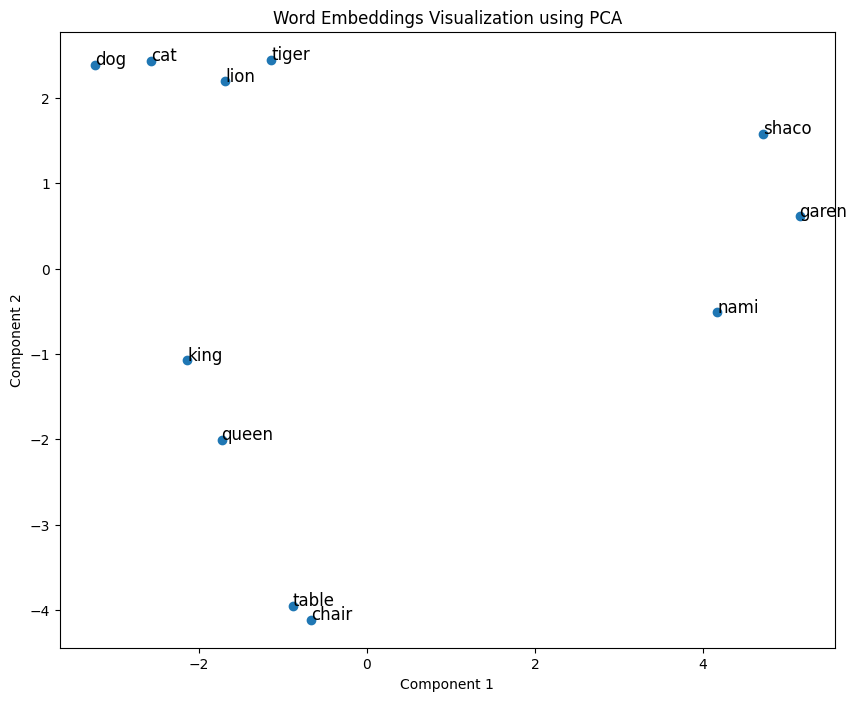

In [ ]:
from sklearn.decomposition import PCA

def plot_embeddings(words):
    vectors = []
    for word in words:
        emb = fetch_embedding(word)
        if np.linalg.norm(emb) > 0:
            vectors.append(emb)

    vectors = np.array(vectors)
    reducer = PCA(n_components=2)

    reduced = reducer.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]), fontsize=12)
    plt.title(f"Word Embeddings Visualization using PCA")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

words_to_plot = ["cat", "dog", "lion", "tiger", "table", "chair", "king", "queen", "shaco", "nami", "garen"]
plot_embeddings(words_to_plot)


In [ ]:
def custom_dissimilarity(emb1, emb2):
    cos = 1 - cos_sim(emb1, emb2)
    dist = np.linalg.norm(emb1 - emb2, 1)
    dist = 2 * dist / (np.linalg.norm(emb1, 1) + np.linalg.norm(emb2, 1))
    return (cos + dist) / 2

# Test on a variety of words
dog_emb = fetch_embedding('dog')
cat_emb = fetch_embedding('cat')
soccer_emb = fetch_embedding('soccer')
print(f"Custom dissimilarity between dog and cat: {custom_dissimilarity(dog_emb, cat_emb)}")
print(f"Custom dissimilarity between dog and soccer: {custom_dissimilarity(dog_emb, soccer_emb)}")
print(f"Custom dissimilarity between cat and soccer: {custom_dissimilarity(cat_emb, soccer_emb)}")

Custom dissimilarity between dog and cat: 0.47361259781413273
Custom dissimilarity between dog and soccer: 0.9702656723602103
Custom dissimilarity between cat and soccer: 1.0490069158186497


This custom metric captures novelty and diversity better than cosine similarity alone by combining directional similarity with a normalized L1 distance that accounts for magnitude differences. The latter component reveals differences in feature intensities that cosine similarity ignores, thereby providing a more comprehensive measure of how two words differ.

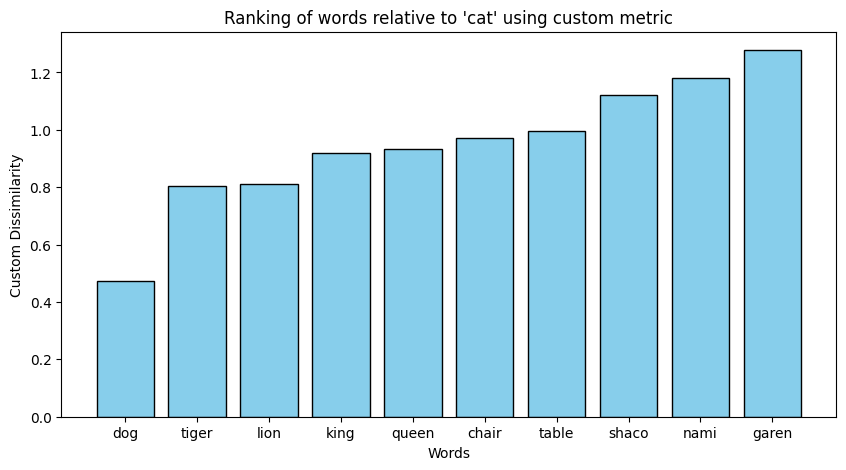

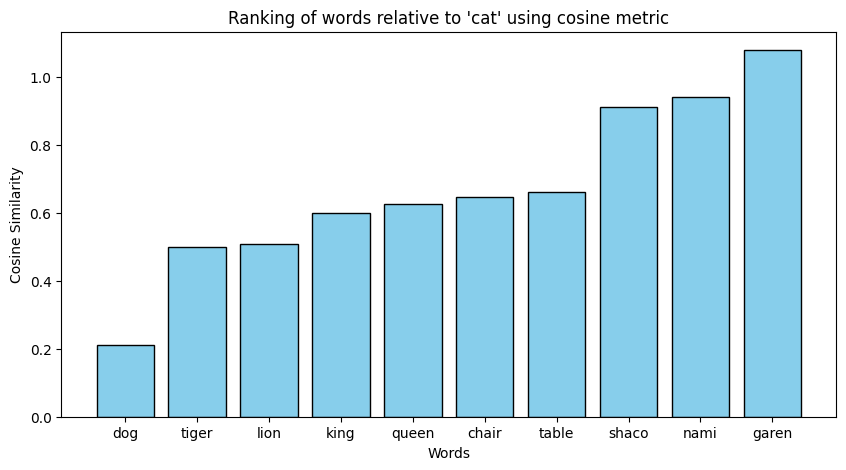

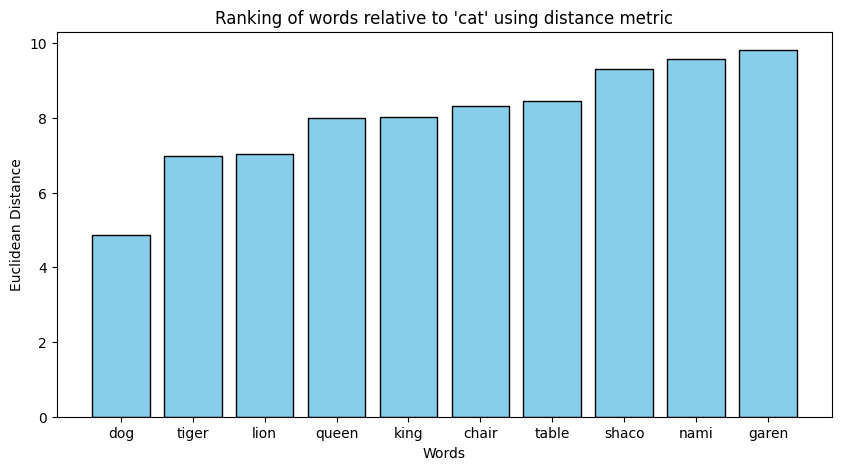

In [ ]:
def sim(emb1, emb, style):
    if style == 'custom':
        return custom_dissimilarity(emb1, emb)
    elif style == 'cosine':
        return 1 - cos_sim(emb1, emb)
    elif style == 'distance':
        return np.linalg.norm(emb1 - emb, 2)


# Plot how cat ranks up to a set of different words on different metrics and plot it
words_to_comp = ["dog", "lion", "tiger", "table", "chair", "king", "queen", "shaco", "nami", "garen"]
styles = ["custom", "cosine", "distance"]
ref_emb = fetch_embedding('cat')
for style in styles:
    scores = []
    for word in words_to_comp:
        emb = fetch_embedding(word)
        score = sim(ref_emb, emb, style)
        scores.append(score)

    ranking = sorted(zip(words_to_comp, scores), key=lambda x: x[1])
    ranked_words, ranked_scores = zip(*ranking)

    plt.figure(figsize=(10, 5))
    plt.bar(ranked_words, ranked_scores, color="skyblue", edgecolor="black")
    plt.title(f"Ranking of words relative to 'cat' using {style} metric")
    plt.xlabel("Words")
    if style == "cosine":
        plt.ylabel("Cosine Similarity")
    elif style == "custom":
        plt.ylabel("Custom Dissimilarity")
    elif style == "distance":
        plt.ylabel("Euclidean Distance")
    plt.ylim(bottom=0)  # ensure y-axis starts at 0 for clarity
    plt.show()

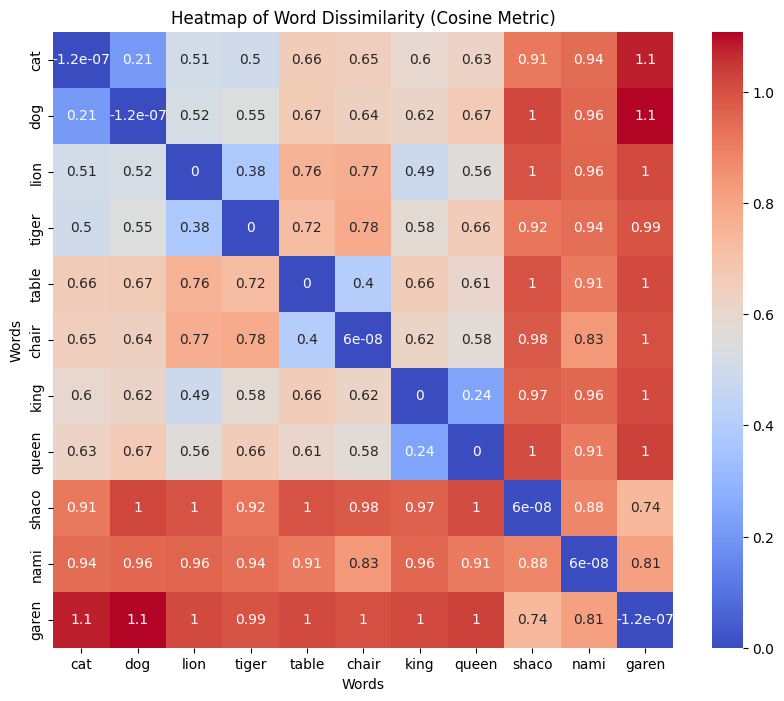

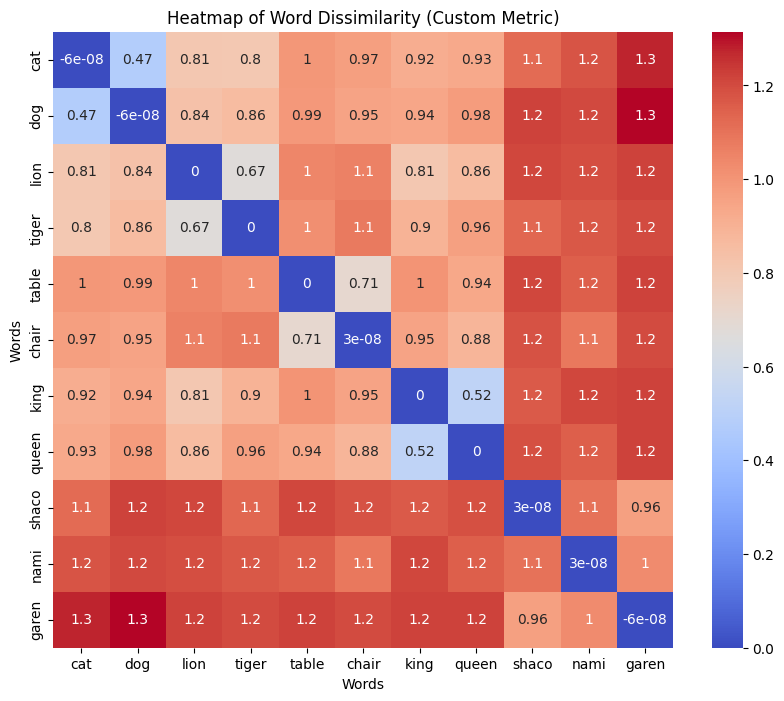

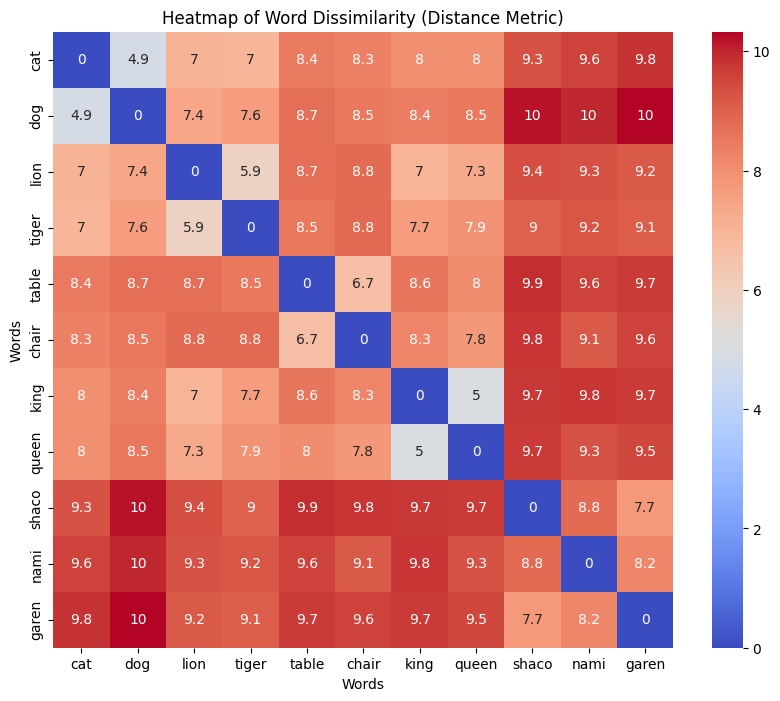

In [ ]:
def compute_similarity_matrix(words, style):
    n = len(words)
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            emb_i = fetch_embedding(words[i])
            emb_j = fetch_embedding(words[j])
            sim_matrix[i, j] = sim(emb_i, emb_j, style)
    return sim_matrix

# List of words to compare
words = ["cat", "dog", "lion", "tiger", "table", "chair", "king", "queen", "shaco", "nami", "garen"]

# Loop over each style and plot its heatmap
for style in ["cosine", "custom", "distance"]:
    matrix = compute_similarity_matrix(words, style)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, xticklabels=words, yticklabels=words, annot=True, cmap="coolwarm")
    plt.title(f"Heatmap of Word Dissimilarity ({style.capitalize()} Metric)")
    plt.xlabel("Words")
    plt.ylabel("Words")
    plt.show()
